<a href="https://colab.research.google.com/github/KimJisanER/KimJisan_TS/blob/main/_2_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
learning_rate = 0.01
training_steps = 1000

In [3]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [4]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
  return W*x + b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred-y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [5]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  
  gradients = tape.gradient(loss,[W,b])

  optimizer.apply_gradients(zip(gradients, [W, b]))


TensorFlow 2.0의 자동 미분 기능인 GradientTape

GradientTape은 자동 미분을 통해 동적으로 Gradient 값들을 확인해 볼 수 있다는 장점을 가지고 있습니다.

apply_gradients 는 W,b 를 업데이트해줌

In [6]:
for step in range(1, training_steps +1):
  run_optimization()

  if step % 50 == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(), b.numpy()))


step:   50	loss: 0.8518	W: 2.1052	b: -0.0802
step:  100	loss: 0.8245	W: 2.2161	b: -0.0580
step:  150	loss: 0.8206	W: 2.2571	b: -0.0458
step:  200	loss: 0.8200	W: 2.2725	b: -0.0398
step:  250	loss: 0.8199	W: 2.2783	b: -0.0370
step:  300	loss: 0.8199	W: 2.2805	b: -0.0358
step:  350	loss: 0.8199	W: 2.2813	b: -0.0353
step:  400	loss: 0.8199	W: 2.2816	b: -0.0351
step:  450	loss: 0.8199	W: 2.2818	b: -0.0350
step:  500	loss: 0.8199	W: 2.2818	b: -0.0349
step:  550	loss: 0.8199	W: 2.2818	b: -0.0349
step:  600	loss: 0.8199	W: 2.2819	b: -0.0349
step:  650	loss: 0.8199	W: 2.2819	b: -0.0349
step:  700	loss: 0.8199	W: 2.2819	b: -0.0349
step:  750	loss: 0.8199	W: 2.2819	b: -0.0349
step:  800	loss: 0.8199	W: 2.2819	b: -0.0349
step:  850	loss: 0.8199	W: 2.2819	b: -0.0349
step:  900	loss: 0.8199	W: 2.2819	b: -0.0349
step:  950	loss: 0.8199	W: 2.2819	b: -0.0349
step: 1000	loss: 0.8199	W: 2.2819	b: -0.0349


W, b 를 Variable에서 numpy로 변환시켜서 깔끔하게 숫자만 나오도록함

\t는 tab

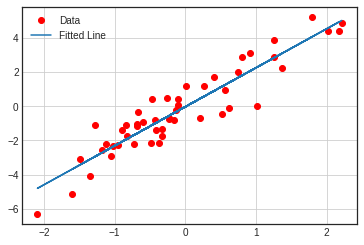

In [8]:
plt.plot(X,Y, 'ro', label='Data')
plt.plot(X, np.array(W*X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [9]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [10]:
epochs =1000
learning_rate = 0.04

### 변수 지정

In [11]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [12]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-0.3093277
-1.7904763
-0.5661725


### 데이터 지정

In [13]:
X = np.random.randn(50)
Y= X**2 + X*np.random.randn(50)

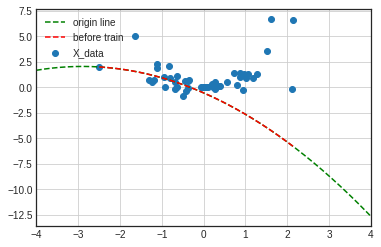

In [15]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label="X_data")
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='before train')
plt.xlim(-4.0,4.0)
plt.legend()
plt.grid()
plt.show()

line_x = np.arange(min(X), max(X), 0.001)

0.001 단위로



### Util Functions

In [16]:
def compute_loss():
  pred_y = a*(np.array(X)**2) + b*np.array(X) + c
  loss = tf.reduce_mean((Y - pred_y)**2)
  return loss

### Optimizer

In [17]:
optimizer = Adam(learning_rate=learning_rate)

### 학습

In [19]:
for epoch in range(1, epochs+1, 1):
  optimizer.minimize(compute_loss, var_list=[a, b, c])

  if epoch % 100 == 0:
    print("epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  200	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  300	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  400	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  500	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  600	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  700	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  800	a: 0.7289	b: 0.2539	c: 0.2356
epoch:  900	a: 0.7289	b: 0.2539	c: 0.2356
epoch: 1000	a: 0.7289	b: 0.2539	c: 0.2356


### 학습 후의 회귀선

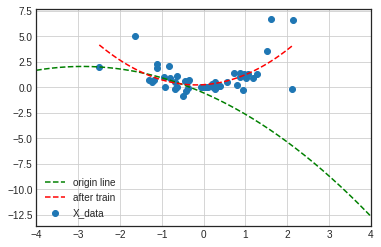

In [21]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c


plt.scatter(X, Y, label="X_data")
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='after train')
plt.xlim(-4.0,4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [22]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [23]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255. , x_test / 255.

11501568/11490434 [==============================] - 0s 0us/step


2d를 1d로 flatten

### tf.data API 사용
- 03 에서 다시 다룸 

In [25]:
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [26]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias') 

### Util Functions

In [27]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x,W) + b)

def cross_entropy(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9,1.)

  return tf.reduce_mean(-tf.reduce_sum(true_y*tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

 pred_y = tf.clip_by_value(pred_y, 1e-9,1.) 크로스에트로피라 min값은 0들어가면 안됨 max는 1로
 
tf.cast는 데이터 타입을 바꿔줌

### Optimizer

In [29]:
optimizer = tf.optimizers.SGD(learning_rate)

In [31]:
def run_optimization(x,y):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)
  
  gradients = tape.gradient(loss, [W,b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [38]:
for step, ( batch_x, batch_y) in enumerate(train_data.take(training_steps),1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print("step: {:4d}\tloss: {:.4f}\taccuracy: {:4f}".format(step, loss, acc))

step:   50	loss: 1.4922	accuracy: 0.679688
step:  100	loss: 1.5620	accuracy: 0.695312
step:  150	loss: 1.5368	accuracy: 0.695312
step:  200	loss: 1.4476	accuracy: 0.703125
step:  250	loss: 1.1648	accuracy: 0.753906
step:  300	loss: 1.1668	accuracy: 0.738281
step:  350	loss: 1.3205	accuracy: 0.761719
step:  400	loss: 1.0747	accuracy: 0.773438
step:  450	loss: 0.9182	accuracy: 0.769531
step:  500	loss: 1.0341	accuracy: 0.765625
step:  550	loss: 0.9848	accuracy: 0.792969
step:  600	loss: 0.9234	accuracy: 0.792969
step:  650	loss: 0.9140	accuracy: 0.824219
step:  700	loss: 0.7594	accuracy: 0.832031
step:  750	loss: 0.8386	accuracy: 0.824219
step:  800	loss: 0.9702	accuracy: 0.828125
step:  850	loss: 1.2025	accuracy: 0.785156
step:  900	loss: 1.0102	accuracy: 0.812500
step:  950	loss: 0.7355	accuracy: 0.847656
step: 1000	loss: 0.8022	accuracy: 0.804688


###  테스트

In [39]:
pred = logistic_regression(x_test)
print("Test Accuarcy:{}".format(accuracy(pred, y_test)))

Test Accuarcy:0.8312000036239624


### 시각화

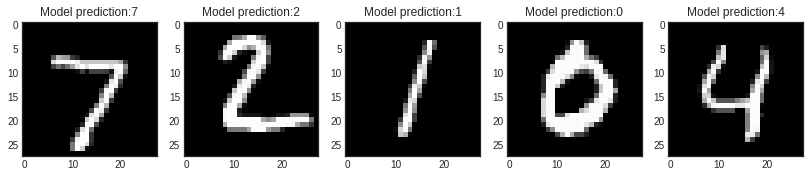

In [40]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(14,8))
for i in range(1, num_images+1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28,28]), cmap='gray')
  plt.title("Model prediction:{}".format(np.argmax(predictions.numpy()[i-1])))

plt.show()